In [49]:
!pip install tensorflow # matplotlib

  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached wrapt-1.17.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp311-cp311-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 782.5 kB/s eta 0:00:00 0:00:01
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 6.2 MB/s eta 0:00:0000:0100:01m
Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
Using cached grpcio-1.71.0-c

In [50]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf


In [4]:
data_path = "../data/Heartbeat_Sound/"
print(os.listdir(data_path))

['unlabel', 'murmur', 'normal', 'artifact', 'extrahls', 'extrastole']


In [5]:
tarin_data      = data_path 
unlabel_data        = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"

In [12]:
data_paths = [normal_data, murmur_data, extrastole_data, artifact_data, extrahls_data]

In [6]:
print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 
print("Extrastole files", len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print("Artifact files:",len(os.listdir(artifact_data))) #length of artifact training sounds 
print("Extrahls files:",len(os.listdir(extrahls_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


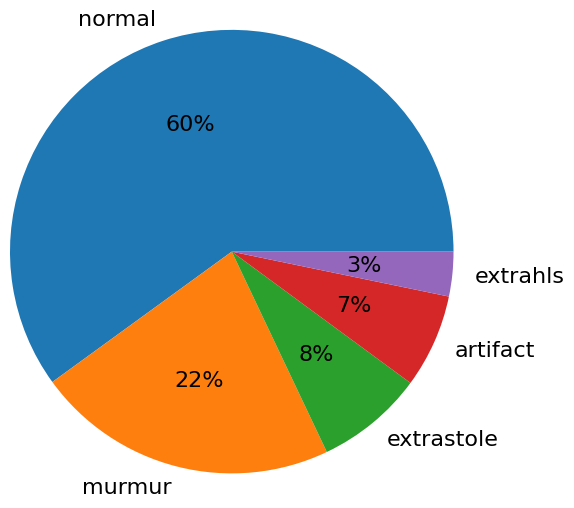

In [9]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

In [33]:
def get_part_random_sample(data_type=''):
    print(data_type)
    random_normal= np.random.randint(0,len(os.listdir(data_type))) 
    sound = os.listdir(data_type)[random_normal]
    sound_address = data_type+sound
    sound_sample, sample_rate = librosa.load(sound_address)
    return sound_sample, sample_rate

In [34]:
signals = []
srs = []
for data_type in data_paths:
    # Загружаем примерный сигнал (замените на свои данные)
    signal, sr = get_part_random_sample(data_type)
    signals.append(signal)
    srs.append(sr)

../data/Heartbeat_Sound//normal/
../data/Heartbeat_Sound//murmur/
../data/Heartbeat_Sound//extrastole/
../data/Heartbeat_Sound//artifact/
../data/Heartbeat_Sound//extrahls/


In [35]:
# Normal
ipd.Audio(signals[0],rate=srs[0])

In [36]:
# MurMur
ipd.Audio(signals[1],rate=srs[1])

In [37]:
# extrastole
ipd.Audio(signals[2],rate=srs[2])

In [38]:
# artifact
ipd.Audio(signals[3],rate=srs[3])

In [39]:
# extrahls
ipd.Audio(signals[4],rate=srs[4])

In [19]:
def plot_spectrogram(signal, sr, ax, title='Mel Spectrogram'):
    # Генерация и отображение спектрограммы
    import librosa.display
    S = librosa.feature.melspectrogram(y=signal, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, sr=sr, ax=ax, x_axis='time', y_axis='mel')
    ax.set_title(title)

def plot_mfcc(signal, sr, ax, title='MFCC'):
    # Генерация и отображение MFCC
    import librosa.display
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    ax.set_title(title)

def plot_chroma(signal, sr, ax, title='Chroma'):
    # Генерация и отображение хромограммы
    import librosa.display
    chroma = librosa.feature.chroma_stft(y=signal, sr=sr)
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    ax.set_title(title)


def plot_features_batch(signals, sr, feature_plot_func, feature_name, batch_size=5, titles=None):
    num_batches = len(signals) // batch_size + (1 if len(signals) % batch_size else 0)
    for batch_idx in range(num_batches):
        batch_signals = signals[batch_idx*batch_size:(batch_idx+1)*batch_size]
        fig, axes = plt.subplots(1, len(batch_signals), figsize=(15, 3))
        if len(batch_signals) == 1:
            axes = [axes]  

        i = 0
        for ax, signal in zip(axes, batch_signals):
            feature_plot_func(signal, sr, ax, titles[i])
            i += 1

        fig.suptitle(f'{feature_name} - batch {batch_idx+1}')
        plt.tight_layout()
        plt.show()

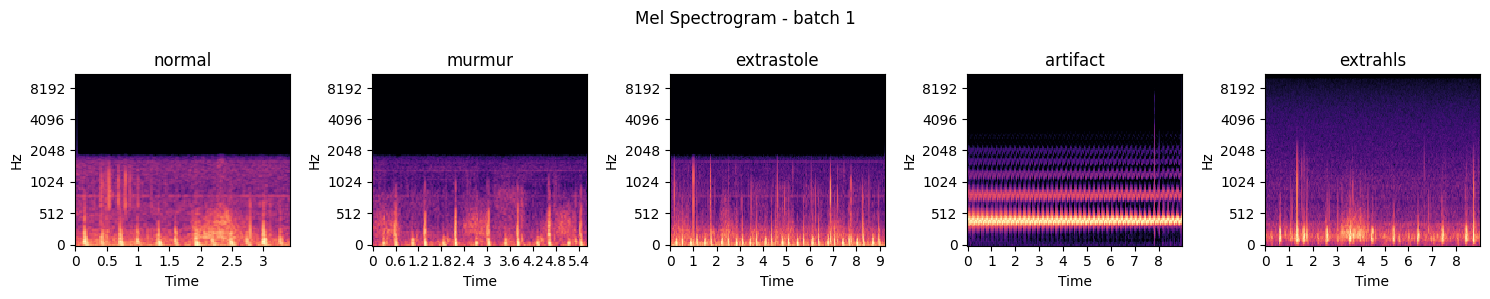

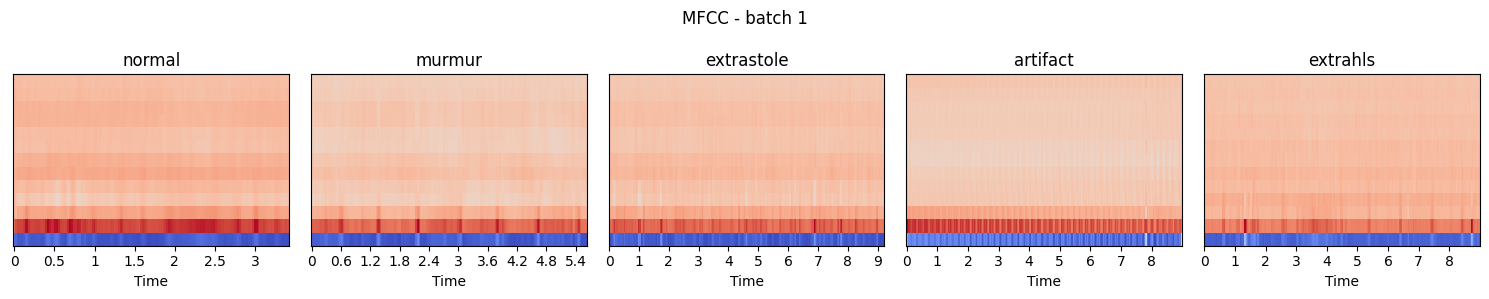

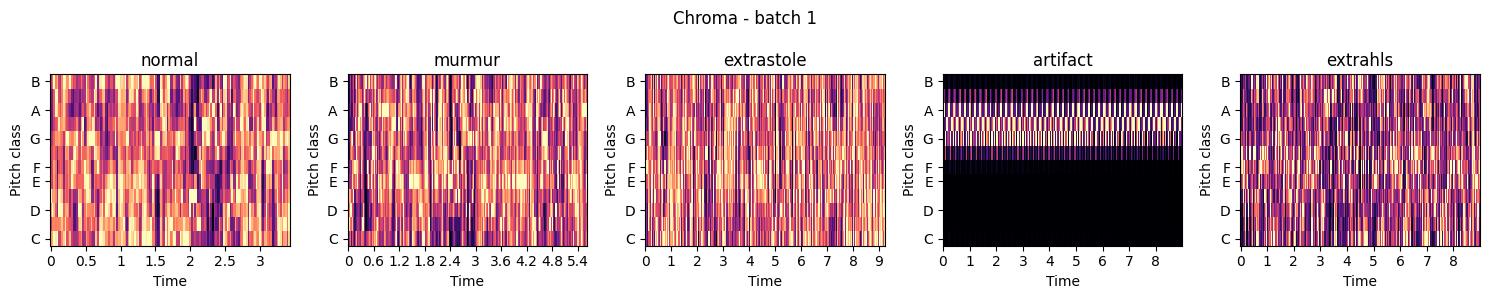

In [40]:
plot_features_batch(signals, sr, plot_spectrogram, 'Mel Spectrogram', batch_size=5, titles=labels)

# Выводим по 5 MFCC
plot_features_batch(signals, sr, plot_mfcc, 'MFCC', batch_size=5, titles=labels)

# Выводим по 5 хромограмм
plot_features_batch(signals, sr, plot_chroma, 'Chroma', batch_size=5, titles=labels)


In [41]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [45]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]


extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")

load file  ../data/Heartbeat_Sound//artifact/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201105280851.wav


/var/folders/bd/zdhwq3v13q12sq0_ry8dk2d80000gn/T/ipykernel_87293/1063719324.py:13: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : artifact__201105280851.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106010559.wav
fixing audio lenght : artifact__201106010559.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106141701.wav
fixing audio lenght : artifact__201106141701.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106070537.wav
fixing audio lenght : artifact__201106070537.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106161016.wav
fixing audio lenght : artifact__201106161016.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106171003.wav
fixing audio lenght : artifact__201106171003.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  ../data/Heartbeat_Sound//artifact/artifact__201106021541.wav
fixing audio lenght : artifact__

In [81]:
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))
y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)


In [69]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight


{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

In [63]:
x_train.shape

(374, 25, 1)

In [64]:
y_train.shape

(374, 3)

In [57]:

!pip install catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 11.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

In [89]:
# Масштабирование данных
def scale_3d_data(x_data):
    original_shape = x_data.shape
    x_2d = x_data.reshape(-1, original_shape[-1])
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_2d)
    return x_scaled.reshape(original_shape)

x_train_scaled = scale_3d_data(x_train)
x_test_scaled = scale_3d_data(x_test)

# Для классических ML-моделей преобразуем 3D в 2D (усредняем по временной оси)
x_train_2d = x_train_scaled.mean(axis=1)
x_test_2d = x_test_scaled.mean(axis=1)

# Функция для оценки моделей (работает с оригинальными метками, не one-hot)
def evaluate_model(model, x_test, y_test, model_name, results):
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    results[model_name] = {
        'Accuracy': accuracy,
        'F1-score': f1,
        'Precision': precision,
        'Recall': recall
    }
    return results

# Словарь для хранения результатов
results = {}

# 1. Логистическая регрессия
print("Training Logistic Regression...")
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(x_train_2d, y_train)  # y_train должен быть 1D массивом с метками классов
results = evaluate_model(lr, x_test_2d, y_test, "Logistic Regression", results)

# 2. Метод опорных векторов
print("Training SVM...")
svm = SVC(decision_function_shape='ovo', probability=True)
svm.fit(x_train_2d, y_train)
results = evaluate_model(svm, x_test_2d, y_test, "SVM", results)

# 3. Случайный лес (с подбором параметров)
print("Training Random Forest...")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1)
rf_grid.fit(x_train_2d, y_train)
best_rf = rf_grid.best_estimator_
results = evaluate_model(best_rf, x_test_2d, y_test, "Random Forest", results)

# 4. XGBoost (с подбором параметров)
print("Training CatBoost...")
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.1]
}
xgb = CatBoostClassifier(verbose=0, random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1)
xgb_grid.fit(x_train_2d, y_train)
best_xgb = xgb_grid.best_estimator_
results = evaluate_model(best_xgb, x_test_2d, y_test, "CatBoost", results)

# 5. K-ближайших соседей (с подбором параметров)
print("Training KNN...")
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1)
knn_grid.fit(x_train_2d, y_train)
best_knn = knn_grid.best_estimator_
results = evaluate_model(best_knn, x_test_2d, y_test, "KNN", results)

# Вывод результатов в таблицу
results_df = pd.DataFrame(results).T
print("\nResults Comparison:")
print(results_df)

# Нахождение лучшей модели по F1-score
best_model_name = results_df['F1-score'].idxmax()
print(f"\nBest model is {best_model_name} with F1-score: {results_df.loc[best_model_name, 'F1-score']:.4f}")

Training Logistic Regression...
Training SVM...
Training Random Forest...


/Users/annatekuceva/PycharmProjects/stetoscope/ElectronicStetoscope-Automizer-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/annatekuceva/PycharmProjects/stetoscope/ElectronicStetoscope-Automizer-/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annatekuceva/PycharmProjects/stetoscope/ElectronicStetoscope-Automizer-/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

Training CatBoost...
Training KNN...

Results Comparison:
                     Accuracy  F1-score  Precision    Recall
Logistic Regression  0.743590  0.634238   0.552926  0.743590
SVM                  0.717949  0.637263   0.573848  0.717949
Random Forest        0.752137  0.723630   0.716239  0.752137
CatBoost             0.769231  0.707628   0.697385  0.769231
KNN                  0.717949  0.696972   0.688927  0.717949

Best model is Random Forest with F1-score: 0.7236


/Users/annatekuceva/PycharmProjects/stetoscope/ElectronicStetoscope-Automizer-/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [91]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

/Users/annatekuceva/PycharmProjects/stetoscope/ElectronicStetoscope-Automizer-/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 25, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │         4,803 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,747 (780.26 KB)

 Trainable params: 199,747 (780.26 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [101]:
y_train.shape

(468, 3)

In [102]:
y_test.shape

(117, 3)

In [107]:
history=model.fit(x_train, y_train, 
                  batch_size=5, 
                  epochs=50,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_test, y_test)) 

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.7110 - loss: 0.3858 - val_acc: 0.8376 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.7282 - loss: 0.3805 - val_acc: 0.7521 - val_loss: 0.7461 - learning_rate: 8.0000e-04
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.7549 - loss: 0.3760 - val_acc: 0.7607 - val_loss: 0.7641 - learning_rate: 6.4000e-04
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.7881 - loss: 0.3834 - val_acc: 0.7778 - val_loss: 0.7118 - learning_rate: 5.1200e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.8231 - loss: 0.3388 - val_acc: 0.7436 - val_loss: 0.8297 - learning_rate: 4.0960e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.7814 - loss: 0.3656 - val_acc: 0.7778 - val_loss: 0.8519 - learning_rate: 3.2768e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.7900 - loss: 0.3269 - val_acc: 0.7863 - val_loss: 0.8522 - learning_rate: 

<Axes: >

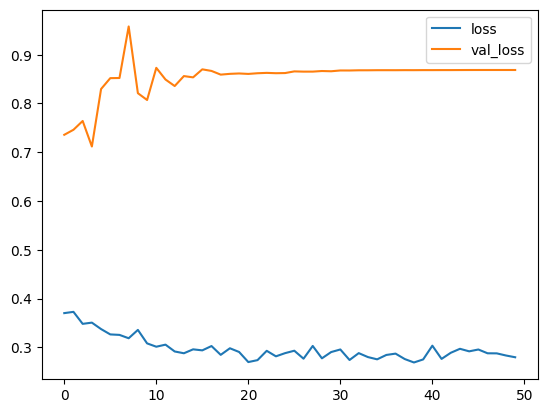

In [108]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

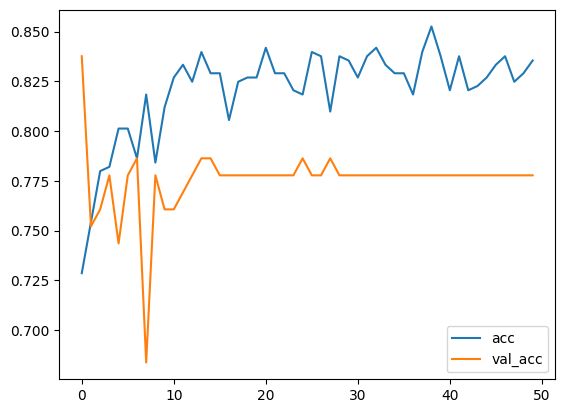

In [109]:
losses[['acc','val_acc']].plot()

In [110]:
model.save('heart_sounds.h5')

In [111]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
prediction test return : 2 - normal


In [112]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [113]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [114]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.88      0.88      0.88         8
      murmur       0.45      0.68      0.55        22
      normal       0.91      0.79      0.85        87

    accuracy                           0.78       117
   macro avg       0.75      0.78      0.76       117
weighted avg       0.82      0.78      0.79       117

